In [1]:
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import pandas as pd

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',clean_up_tokenization_spaces=True)
model = BertModel.from_pretrained('bert-base-uncased')

In [2]:
def collect_word_embeddings(word, sentences, tokenizer, model):
    embeddings = []
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors='pt')
        outputs = model(**inputs)
        last_hidden_state = outputs.last_hidden_state[0]
        
        tokens = tokenizer.tokenize(sentence)
        target_indices = [i for i, token in enumerate(tokens) if word in token]
        adjusted_indices = [i + 1 for i in target_indices]
        
        if not adjusted_indices:
            continue
        
        word_embeddings = last_hidden_state[adjusted_indices]
        word_embedding = word_embeddings.mean(dim=0)
        embeddings.append(word_embedding.detach().numpy())
    return embeddings

In [3]:
# Set up sentences that all use the same word with the same meaning.
sentences = [
    "He went to the bank to deposit money.",
    "He went to the bank to withdraw money.",
    "He went to the bank to open an account.",
    "He went to the bank to steal money.",
    "He works as a teller at the bank.",
    "He swam to the river bank.",
    "An airplane has to bank to turn.",
    "The airplane disappeared into a cloud bank.",
]

embeddings = collect_word_embeddings("bank", sentences, tokenizer, model)

Now let's see how the same word ("bank") gets different embedding similarity values when used in different sentences.

In [4]:
# Convert list of embeddings to numpy array
embeddings_array = np.vstack(embeddings)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings_array)

print("Cosine Similarity Matrix:")
#print(similarity_matrix)
df = pd.DataFrame(similarity_matrix)
df.style.format(precision=3)

Cosine Similarity Matrix:


,0,1,2,3,4,5,6,7
0,1.000,0.974,0.950,0.944,0.801,0.547,0.452,0.460
1,0.974,1.000,0.955,0.956,0.826,0.554,0.468,0.471
2,0.950,0.955,1.000,0.934,0.836,0.547,0.468,0.464
3,0.944,0.956,0.934,1.000,0.842,0.541,0.478,0.479
4,0.801,0.826,0.836,0.842,1.000,0.499,0.452,0.440
5,0.547,0.554,0.547,0.541,0.499,1.000,0.531,0.607
6,0.452,0.468,0.468,0.478,0.452,0.531,1.000,0.597
7,0.460,0.471,0.464,0.479,0.440,0.607,0.597,1.000


In [5]:
# Helper function to plot similarity matrix heat map
def plot_similarity(labels, sim, rotation):
    sns.set_theme(font_scale=1.2)
    g = sns.heatmap(sim, xticklabels=labels, yticklabels=labels, vmin=0, vmax=1, cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")
    return g

<Axes: title={'center': 'Semantic Textual Similarity'}>

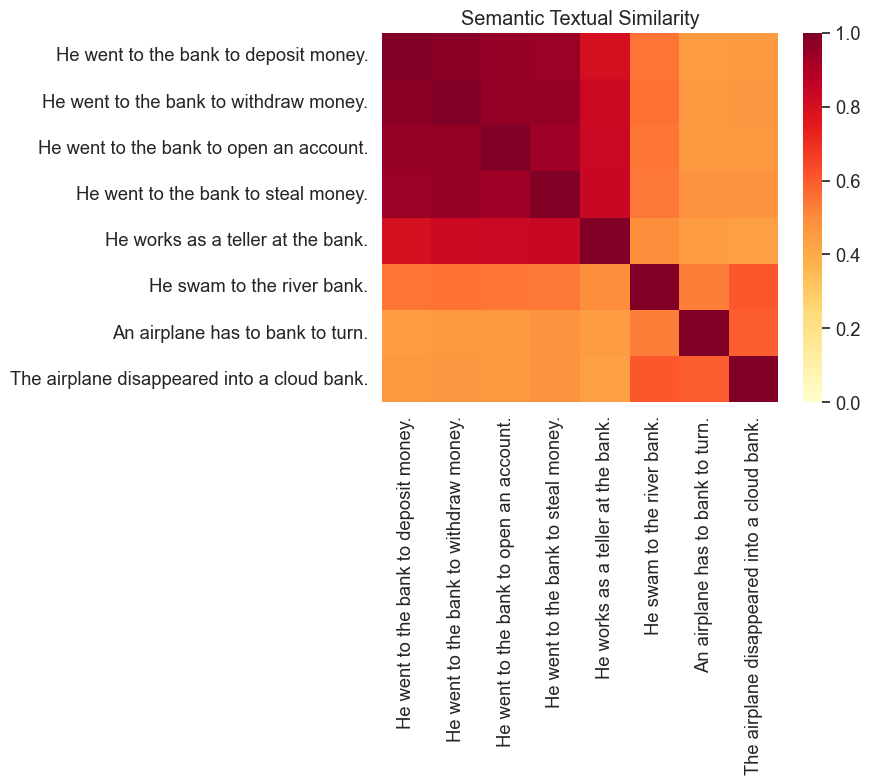

In [6]:
plot_similarity(sentences, similarity_matrix, 90)